# TRANG SỨC 

#### Võ Hửu Nghĩa

1. Loại trang sức(gem) nào được sử dụng trong các sản phẩm và giá trị của nó là bao nhiêu
2. Top 5 Kim loại(metal) được sử dụng nhiều nhất
3. Giá trung bình của đồ trang sức phân theo kim loại là bao nhiêu
4. Giá trung bình của mỗi kim loại là bao nhiêu
5. Có bao nhiêu trang sức(gem) trong mỗi loại sản phẩm
6. Giá trung bình của trang sức(gem) trong mỗi loại sản phẩm
7. Top 5 loại trang sức đắc tiền nhất


 IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

ĐỌC TẬP DỮ LIỆU BẰNG THƯ VIỆN PANDAS

In [2]:
cartier = pd.read_csv('./cartier_catalog.csv')
cartier.sample(4)

,ref,categorie,title,price,tags,description,image
55,N4225000,rings,Panthère de Cartier ring,20700.0,"yellow gold, diamonds, emeralds, onyx","Panthère de Cartier ring, 18K yellow gold, set...",/content/dam/rcq/car/14/41/41/2/1441412.png
209,B4216900,rings,Juste un Clou ring,3800.0,"yellow gold, diamonds","Juste un Clou ring, 18K yellow gold, set with ...",/content/dam/rcq/car/10/54/36/9/1054369.png
166,B4086300,rings,Étincelle de Cartier wedding band,4550.0,"yellow gold, diamonds","Étincelle de Cartier wedding band, 18K yellow ...",/content/dam/rcq/car/92/55/72/925572.png
687,B8301416,earrings,Clash de Cartier earrings Small Model,7500.0,pink gold,"Clash de Cartier earrings, small model, 18K pi...",/content/dam/rcq/car/19/15/81/7/1915817.png


XEM TỔNG SỐ HÀNG VÀ SỐ CỘT

In [3]:
cartier.shape

(692, 7)

CHI TIẾT VỀ KIỂU DỮ LIỆU VÀ CÁC CỘT BỊ THIẾU DỮ LIỆU

In [4]:
cartier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ref          692 non-null    object 
 1   categorie    692 non-null    object 
 2   title        692 non-null    object 
 3   price        692 non-null    float64
 4   tags         692 non-null    object 
 5   description  692 non-null    object 
 6   image        692 non-null    object 
dtypes: float64(1), object(6)
memory usage: 38.0+ KB


XEM CÁC GIÁ TRỊ CỦA BIẾN PRICE

In [5]:
cartier.describe().T

,count,mean,std,min,25%,50%,75%,max
price,692.0,27057.16763,54549.444975,500.0,2620.0,6800.0,22225.0,370000.0


1. Loại trang sức(gem) nào được sử dụng trong các sản phẩm và giá trị của nó là bao nhiêu


TÁCH RIÊNG TỪNG GIÁ TRỊ TRONG CỘT TAGS SAU ĐÓ ĐẾM SỐ LƯỢNG TỪNG LOẠI 

In [6]:
#Tách cột tags ra từng giá trị, sau đó tách riêng các giá trị thành các hàng riêng biệt(sau bước này dattafame đã có 1600 dòng, sau đó đếm số lượng của từng giá trị rồi chuyển về dạng dataframe)
gem_cartier= (cartier['tags'].str.split(',')).explode().value_counts().to_frame()
gem_cartier.reset_index('tags',inplace=True)
# Đổi tên cột
gem_cartier.columns = ['gem_type','count']
gem_cartier.sample(6)



,gem_type,count
40,brown diamonds,1
35,spessartite garnet,1
45,obsidians,1
33,non-rhodiumized white gold,2
43,carnelian,1
20,spinels,4


Trực quan kết quả trên



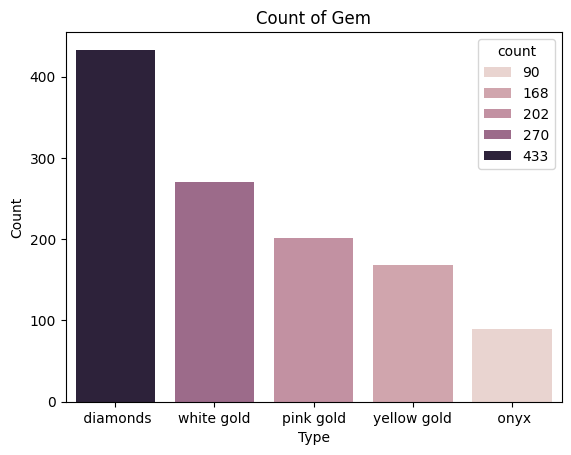

In [7]:
# Chọn ra 5 gem_type có giá trị lớn nhất
top_5_gem_type = gem_cartier.nlargest(5,'count')[['gem_type','count']]
sns.barplot(data = top_5_gem_type, x='gem_type',y='count',hue='count')
plt.title('Count of Gem')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

2. Top 5 Kim loại(metal) được sử dụng nhiều nhất


In [8]:
#tách cột tags ra, sau đó sử dụng hàm explode để tách thành từng dòng, mỗi dòng ứng với mỗi giá trị của tags(nếu tags có bao nhiêu giá trị thì sẽ tạo ra bấy nhiêu dòng)
cartier['str_split'] = cartier['tags'].str.split(',')
cartier_exploded = cartier.explode('str_split')
cartier_exploded['metal'] = cartier_exploded['str_split'].str.strip()

kiểm tra lại số lượng cột cũng như hàng sau khi sử dụng hàm explode()

In [9]:
cartier_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1595 entries, 0 to 691
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ref          1595 non-null   object 
 1   categorie    1595 non-null   object 
 2   title        1595 non-null   object 
 3   price        1595 non-null   float64
 4   tags         1595 non-null   object 
 5   description  1595 non-null   object 
 6   image        1595 non-null   object 
 7   str_split    1595 non-null   object 
 8   metal        1595 non-null   object 
dtypes: float64(1), object(8)
memory usage: 124.6+ KB


- tập dữ liệu ban đầu có 692 dòng, sau khi sử dụng hàm explode đã tăng lên 1595 dòng

Bây giờ thực hiện gom nhóm category và thực hiện đếm số metal theo category

In [10]:
#gop nhóm theo loại và đếm số lượng của từng loại
cartier_category_metal = cartier_exploded.groupby('categorie')['metal'].value_counts().to_frame()
cartier_category_metal.columns = ['count']
cartier_category_metal=cartier_category_metal.reset_index()
cartier_category_metal.sample(10)

,categorie,metal,count
16,bracelets,garnets,1
57,necklaces,tsavorite garnets,11
80,necklaces,spinels,1
74,necklaces,non-rhodiumized white gold,1
65,necklaces,malachite,2
0,bracelets,diamonds,94
103,rings,non-rhodiumized white gold,1
3,bracelets,yellow gold,49
76,necklaces,pink sapphire,1
68,necklaces,diamonds.,2


Kiểm tra lại tính đúng dắn của cột metal, chúng ta đếm giá trị của cột metal sau đó tính tổng so sánh với độ dài trong dataframe

In [11]:
# Đếm số lượng các giá trị của cột "metal"
metal_counts = cartier_exploded['metal'].value_counts()

# Tính tổng số lượng các giá trị đã đếm
total_count = metal_counts.sum()

# Kiểm tra tổng số lượng các giá trị đã đếm có khớp với tổng số hàng trong DataFrame hay không
is_count_correct = total_count == len(cartier_exploded)

print("Is count correct?", is_count_correct)
print("Total count:", total_count)
print("Metal counts:")
print(metal_counts)

Is count correct? True
Total count: 1595
Metal counts:
metal
diamonds                      433
white gold                    275
pink gold                     239
yellow gold                   205
onyx                           90
emeralds                       70
diamond                        61
platinum                       51
tsavorite garnets              35
sapphires                      19
ceramic                        17
lacquer                        11
mother-of-pearl                 9
black lacquer                   8
tsavorite garnet                8
white mother-of-pearl           7
lapis lazuli                    5
spinels                         4
chrysoprase                     4
malachite                       3
carnelians                      3
amazonite                       3
pink sapphire                   3
amethysts                       2
diamonds.                       2
aventurine                      2
rubies                          2
pearl                

Trực quan số liệu trên

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


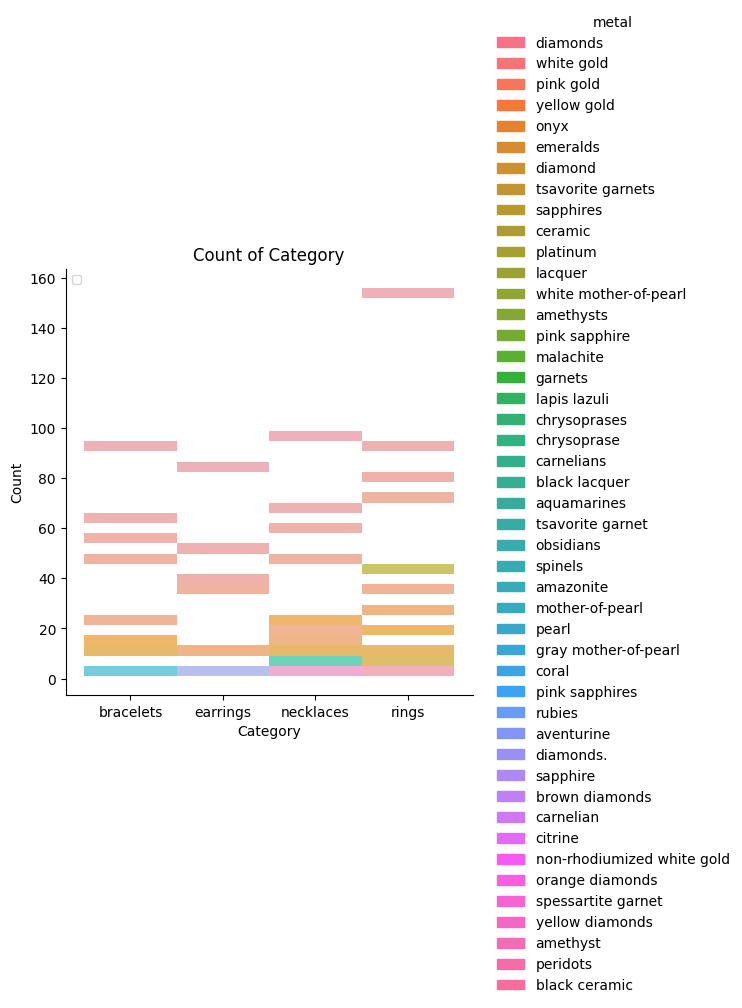

In [12]:
sns.displot(data =cartier_category_metal, x='categorie',y='count',hue='metal')
plt.title('Count of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(loc = "upper left",fontsize = "small")
plt.show()

3. Giá trung bình của đồ trang sức phân theo kim loại là bao nhiêu

In [19]:
#gop nhóm theo loại và tính trung bình theo từng loại
mean_cartier_category_metal = cartier_exploded.groupby(['categorie','metal'])['price'].mean().round(2).reset_index()
mean_cartier_category_metal.columns = ['categorie', 'metal','price-mean']
mean_cartier_category_metal.head(20)

,categorie,metal,price-mean
0,bracelets,amazonite,56000.00
1,bracelets,amethysts,8000.00
2,bracelets,aquamarines,8250.00
3,bracelets,black lacquer,35000.00
4,bracelets,carnelians,217000.00
5,bracelets,ceramic,13258.00
6,bracelets,chrysoprase,68500.00
7,bracelets,chrysoprases,217000.00
8,bracelets,diamond,3442.86
9,bracelets,diamonds,68851.70


Trực quan hoá số liệu trên 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


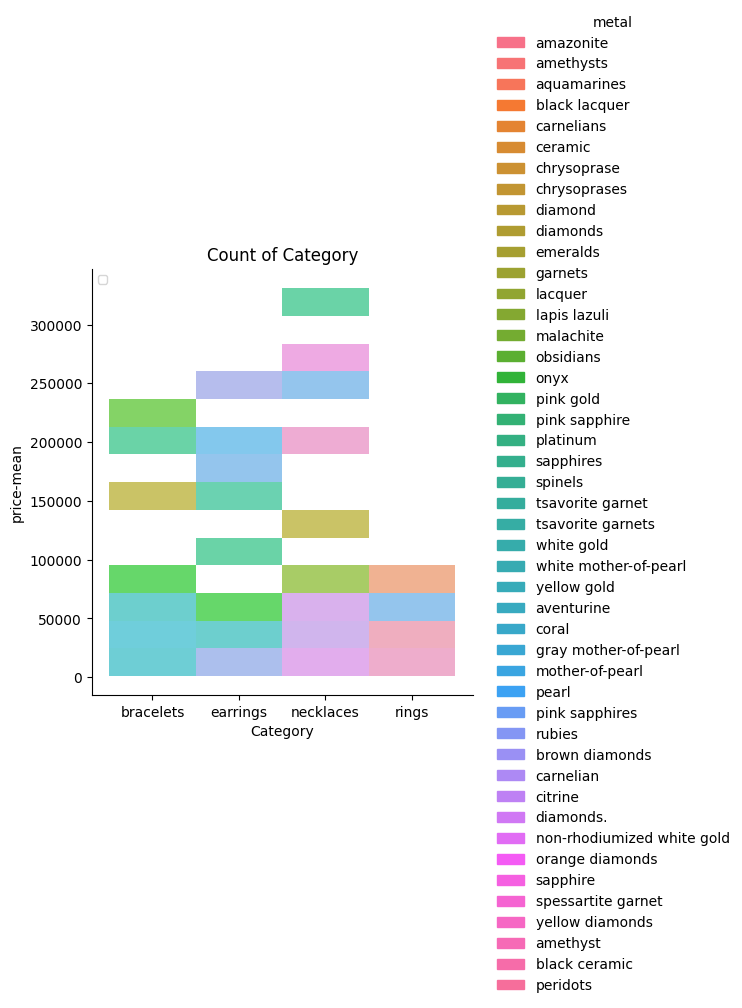

In [22]:
sns.displot(data =mean_cartier_category_metal, x='categorie',y='price-mean',hue='metal')
plt.title('Count of Category')
plt.xlabel('Category')
plt.ylabel('price-mean')
plt.legend(loc = "upper left",fontsize = "small")
plt.show()